In [24]:
import numpy as np
import pandas as pd
import math
import cvxpy as cp
import itertools
import matplotlib.pyplot as plt

def get_vector(l):
    return np.array(l).reshape(len(l), 1)

def sigma_2(weights, cov):
    return weights.T.dot(cov).dot(weights)[0, 0]

def sigma(weights):
    return math.sqrt(sigma_2(weights, cov))

def r_geom(weights, cov, r):
    return (weights.T.dot(r) - 0.5 * sigma_2(weights, cov))[0, 0]

def sharpe_geom(weights, cov, r):
    return r_geom(weights, cov, r) / math.sqrt(sigma_2(weights, cov))

# calculates covariance matrix from correlation matrix
def covariance(correl, std):
    return std.dot(std.T) * correl
    
data_old = {"SP": {"AM": 8.2/100, "GM": 6.23/100, "std": 19.8/100, "SR": 0.315},
            "10Y": {"AM": 2.2/100, "GM": 1.86/100, "std": 8.27/100, "SR": 0.225}}

data = {"SP": {"AM": 5/100, "GM": 3/100, "std": 19.8/100, "SR": 0.15},
        "10Y": {"AM": 1.6/100, "GM": 1.3/100, "std": 8.27/100, "SR": 0.15},
        "BOND": {"AM": 0.4/100, "GM": 0.38/100, "std": 2.07/100, "SR": 0.18}}

data_old_df = pd.DataFrame(data_old).transpose()
data_df = pd.DataFrame(data).transpose()


Max geom return weights [[0.9 0.1]]
Max Sharpe Ratio weights [[0.32 0.68]]
Min Volatility weights [[0.14 0.86]]


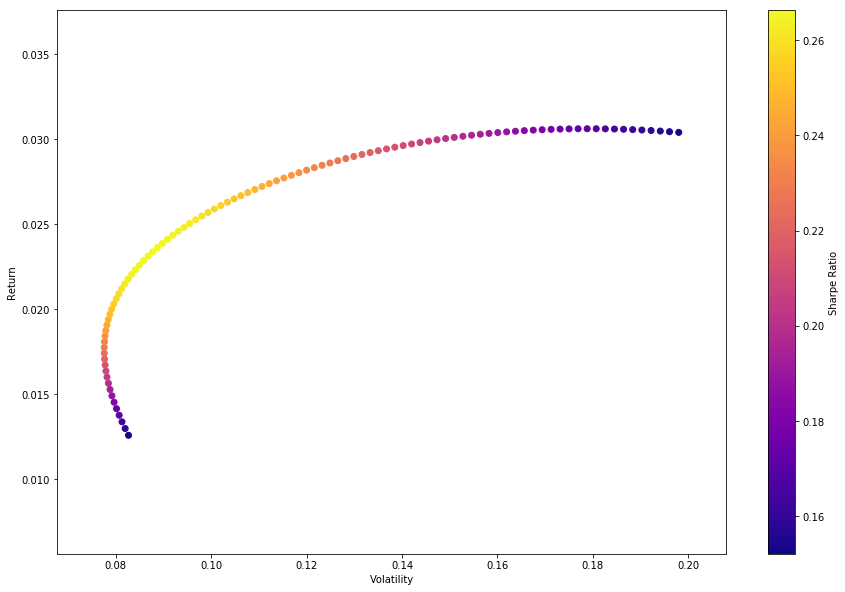

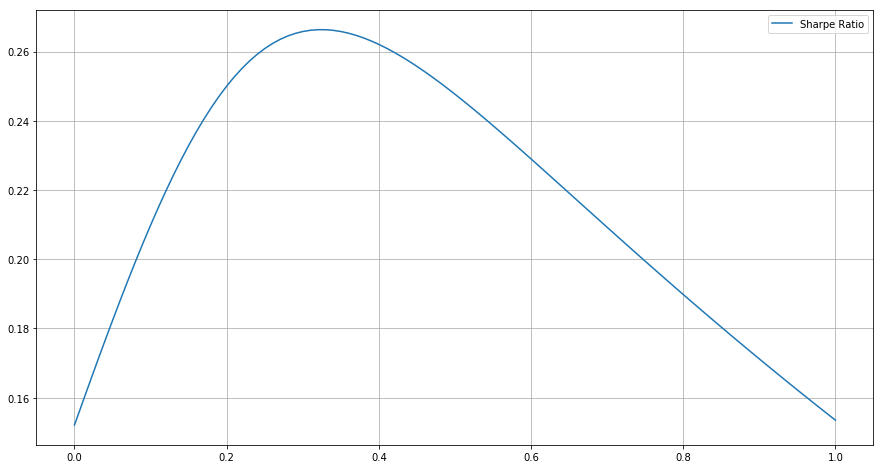

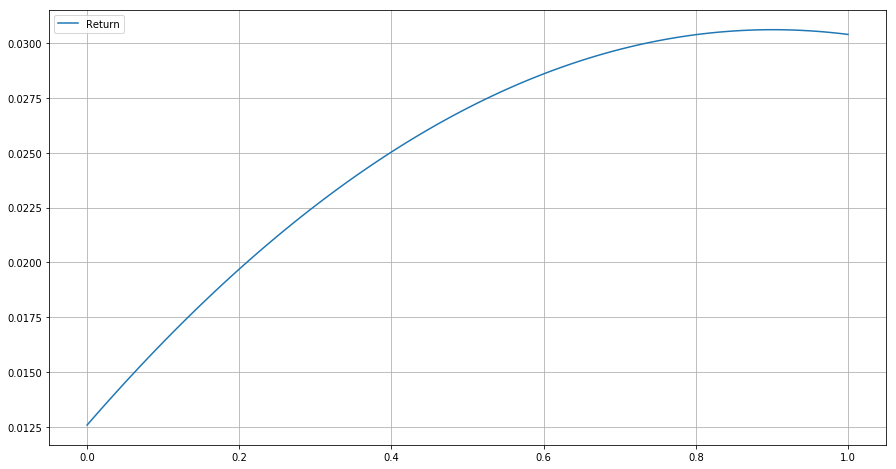

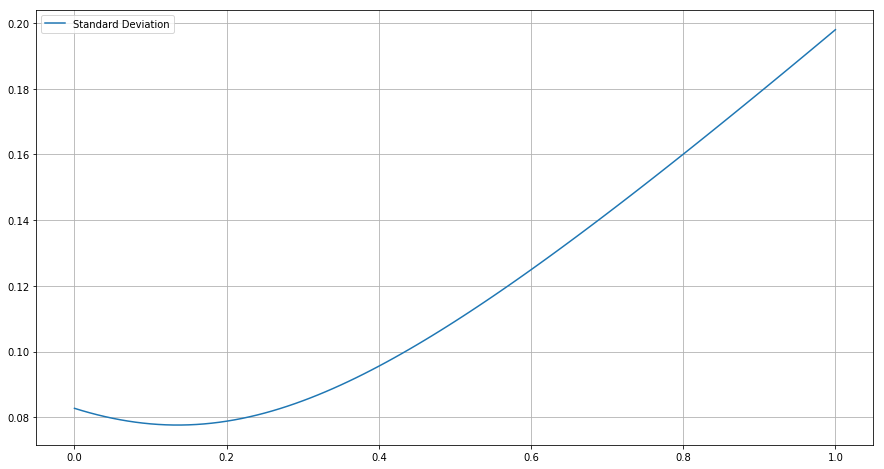

In [41]:
r = get_vector(data_old_df.loc[:, "AM"])
std = get_vector(data_old_df.loc[:, "std"])

r = get_vector(data_df.loc[["SP", "10Y"], "AM"])
std = get_vector(data_df.loc[["SP", "10Y"], "std"])

correl = np.array([[1, 0.05], [0.05, 1]])
weights = get_vector([0.6, 0.4])
cov = covariance(correl, std)

n = 100
w1 = np.linspace(0, 1, n + 1)
w2 = 1 - w1

weights = [get_vector([w1[i], w2[i]]) for i in range(0, n + 1)]

r_geom_array = np.array([r_geom(w, cov, r) for w in weights])
sharpe_geom_array = np.array([sharpe_geom(w, cov, r) for w in weights])
sigma_array = np.array([sigma(w) for w in weights])

# max geom return
print("Max geom return weights {}".format(weights[np.argmax(r_geom_array)].T))

# max SR
print("Max Sharpe Ratio weights {}".format(weights[np.argmax(sharpe_geom_array)].T))

# min vol
print("Min Volatility weights {}".format(weights[np.argmin(sigma_array)].T))

plt.figure(figsize=(15, 10))
plt.scatter(sigma_array, r_geom_array, c=sharpe_geom_array, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.figure(figsize=(15, 8))
plt.plot(w1, sharpe_geom_array, label="Sharpe Ratio")
plt.grid()
plt.legend()

plt.figure(figsize=(15, 8))
plt.plot(w1, r_geom_array, label="Return")
plt.grid()
plt.legend()

plt.figure(figsize=(15, 8))
plt.plot(w1, sigma_array, label="Standard Deviation")
plt.grid()
plt.legend()